## Importing the libraries

In [52]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report

## Loading the dataset

In [53]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [54]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [55]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


## Define X by selecting only the age and EstimatedSalary, and y with purchased column

In [56]:
X = dataset.drop(columns=['User ID','Gender','Purchased'], axis=1)
y = dataset['Purchased']

In [57]:
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [58]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

## Print count of each label in Purchased column

In [59]:
y.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

## Print Correlation of each feature in the dataset

In [60]:
dataset.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


# First: Logistic Regression model

## Split the dataset into Training set and Test set with test_size = 0.25 and random_state = 0

In [61]:
x_train, x_test , y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

## Train the model with random_state = 0

In [62]:
model = LogisticRegression(random_state=0)
model.fit(x_train,y_train)

LogisticRegression(random_state=0)

## Print the prediction results

In [63]:
predictions = model.predict(x_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

## Create dataframe with the Actual Purchased and Predict Purchased

In [64]:
test_dataset = pd.DataFrame({'Age': x_test['Age'],'EstimatedSalary':x_test['EstimatedSalary'],
                            'Actual_Purchased':y_test,'Predict_Purchased':predictions})
test_dataset

,Age,EstimatedSalary,Actual_Purchased,Predict_Purchased
132,30,87000,0,0
309,38,50000,0,0
341,35,75000,0,0
196,30,79000,0,0
246,35,50000,0,0
...,...,...,...,...
146,27,96000,1,0
135,23,63000,0,0
390,48,33000,1,0
264,48,90000,1,0


In [65]:
(test_dataset['Actual_Purchased'] == test_dataset['Predict_Purchased']).value_counts()

True     68
False    32
dtype: int64

## Print Confusion Matrix and classification_report

In [66]:
confusion_matrix(y_test,predictions)

array([[68,  0],
       [32,  0]], dtype=int64)

In [67]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        68
           1       0.00      0.00      0.00        32

    accuracy                           0.68       100
   macro avg       0.34      0.50      0.40       100
weighted avg       0.46      0.68      0.55       100



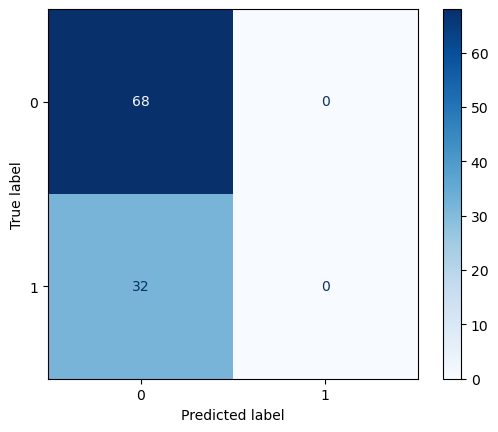

In [68]:
plot_confusion_matrix(model, X=x_test, y_true=y_test, cmap='Blues');

## Use StandardScaler() to improved performance and re-train your model

In [69]:
scaler = StandardScaler()

In [70]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [71]:
model.fit(x_train_scaled, y_train)

LogisticRegression(random_state=0)

In [72]:
y_pred = model.predict(x_test_scaled)

In [73]:
print(classification_report(y_test, y_pred)) # The model accuracy is improved 

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        68
           1       0.83      0.75      0.79        32

    accuracy                           0.87       100
   macro avg       0.86      0.84      0.85       100
weighted avg       0.87      0.87      0.87       100



## Try to Predicting a new result - e.g: person with Age = 30 and Salary = 90,000

In [74]:
new_record = np.array([30,90000])
new_record = new_record.reshape(1,-1)
new_record = scaler.fit_transform(new_record)
print(model.predict(new_record))

[0]


## Try to Predicting a new result - e.g: person with Age = 40 and Salary = 90,000

In [75]:
new_record = np.array([40,90000])
new_record = new_record.reshape(1,-1)
new_record = scaler.fit_transform(new_record)
print(model.predict(new_record))

[0]


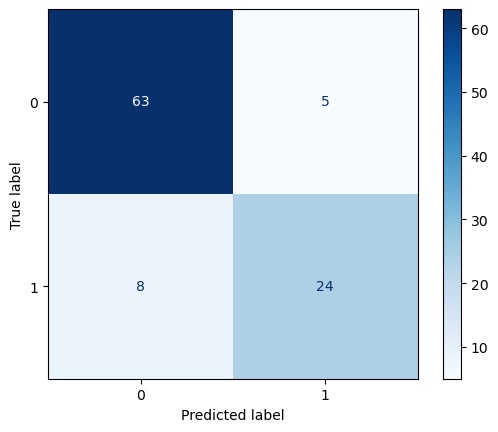

In [76]:
plot_confusion_matrix(model, X=x_test_scaled, y_true=y_test, cmap='Blues'); # The model accuracy is improved 